# 2022 Winter Break Friend Survey Results
### By Lina Molla, last modified on January 4, 2023
*An independent, self-guided project conducted in December of 2022*

Based on the results of a quick survey amongst friends, I have cleaned the results into a readable dataframe that can be used for further data analysis. Using this cleaned up data set, I have conducted exploratory data analysis by presenting the results through easy to interpret visualizations revealing the most insightful information based on the data that was collected.

After reviewing the results of the survey in the data set, supervised machine learning was conducted through a Decision Tree Classification Model. K-fold Cross Validation was used through systematic feature selection and model hyperparameter selection in order to create the classification model. Because this model was created on a data set with high sample bias and a very low number of observations, the model was found to perform very poorly on the test set, which was to be expected. The model was more so carried out to understand whether the data set could have shown any correlations between the group of mutual friends whom the data set was created out of, but the group displayed little insightful findings.

**Warning:** This survey analysis was conducted between close friends with ages ranging from 19-21. That being said, in order to avoid polluting the data with any bias, the uncensored answers given in the survey were left in the survey results. Thus, there is some use of foul language in the following results.

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import random

os.getcwd()
os.chdir('/Users/linamolla/Desktop/Practice')
survey = pd.read_excel('survey.xlsx')

## Data Cleaning
Function to clean and organize the survey data into a readable table:

In [222]:
def clean_survey(data_df):
    df = data_df.copy()
    
    # fix column names
    df.columns = ['Timestamp', 'Email', 'FirstName', 
                'LastName', 'Sex', 'Age', 'Color', 
                'Candy', 'JunkFood', 'HealthySnack', 
                'Spanish', 'English', 'Matcha', 
                'CatsOrDogs', 'ExtrovertOrIntrovert', 
                'ColdOrWarm', 'Weather', 'Temperature', 
                'Married', 'Piercings', 'Kids', 
                'NuggetsOrTenders', 'BodyPart', 
                'CoffeeOrTea', 'Hair', 'Eyes', 'Employed', 
                'Crush', 'HighSchool', 'Die', 'Catchphrase', 
                'Codenames', 'Pick', 'Hoodie', 'Tori2021', 
                'Tori2022', 'Coast', 'Spice',
                'GregCliff', 'ToriCliff', 'Sleep', 
                'California', 'Beverage', 'Career', 
                'Glasses', 'Ticket', 'PulledOver', 'Comments']
    
    # make str column entries lowercase
    str_cols = ['FirstName', 
                'LastName', 
                'Color', 
                'Candy', 
                'JunkFood', 
                'HealthySnack', 
                'Spanish', 
                'English', 
                'BodyPart', 
                'Beverage', 
                'Career', 
                'Comments']
    for col in str_cols:
        df[col] = df[col].str.lower()
    
    # fix messed up entries
    df.at[1,'FirstName'] = 'peter'
    df.at[1,'LastName'] = 'heintschel'
    df.at[3,'Career'] = 'video game'
    df.at[2,'Career'] = 'teaching'
    df.at[12,'Career'] = 'software engineering'
    df.at[12,'Married'] = 'Lina'
    df.at[10,'BodyPart'] = 'feet'
    df.at[5,'Codenames'] = 'Lina'
    df.at[9,'Tori2021'] = 'No'
    df.at[9,'Tori2022'] = 'No'
    df.at[6,'Spice'] = '4'
    df.at[1,'BodyPart'] = 'shoulders'
    df.loc[df['BodyPart'].str.contains('feet'), 'BodyPart'] = 'feet'
    df.loc[df['BodyPart'].str.contains('toes'), 'BodyPart'] = 'toes'
    df.loc[df['JunkFood'].str.contains('potato chips'), 'JunkFood'] = 'chips'
    df.loc[df['JunkFood'].str.contains('spicy'), 'JunkFood'] = 'takis or hot cheetos'
    df.loc[df['JunkFood'].str.contains('takis'), 'JunkFood'] = 'takis or hot cheetos'
    df.loc[df['JunkFood'].str.contains('hot cheetos'), 'JunkFood'] = 'takis or hot cheetos'
    df.loc[df['JunkFood'].str.contains('vinegar'), 'JunkFood'] = 'salt and vinegar chips'
    df.loc[df['Color'].str.contains('blue'), 'Color'] = 'blue'
    df.loc[df['Color'].str.contains('green'), 'Color'] = 'green'
    df.loc[df['Color'].str.contains('black'), 'Color'] = 'black'
    df.loc[df['Color'].str.contains('purple'), 'Color'] = 'purple'
    df.loc[df['Beverage'].str.contains('twisted'), 'Beverage'] = 'twisted tea'

    # add FullName column
    df['FullName'] = df.FirstName + ' ' + df.LastName
    
    # add STEM column
    df['STEM'] = 0
    df.loc[df['Career'].str.contains('data'), 'STEM'] = '1'
    df.loc[df['Career'].str.contains('engineer'), 'STEM'] = '1'
    df.loc[df['Career'].str.contains('video'), 'STEM'] = '1'
    df.loc[df['Career'].str.contains('tech'), 'STEM'] = '1'
    
    # add Field column
    df['Field'] = np.NaN
    df.loc[df['Career'].str.contains('data'), 'Field'] = 'STEM'
    df.loc[df['Career'].str.contains('engineer'), 'Field'] = 'STEM'
    df.loc[df['Career'].str.contains('video'), 'Field'] = 'STEM'
    df.loc[df['Career'].str.contains('tech'), 'Field'] = 'STEM'
    df.loc[df['Career'].str.contains('vet'), 'Field'] = 'medical'
    df.loc[df['Career'].str.contains('pharmacist'), 'Field'] = 'medical'
    df.loc[df['Career'].str.contains('p.t'), 'Field'] = 'medical'
    df.loc[df['Career'].str.contains('therapy'), 'Field'] = 'medical'
    df.loc[df['Career'].str.contains('planning'), 'Field'] = 'business'
    df.loc[df['Career'].str.contains('finance'), 'Field'] = 'business'
    df.loc[df['Career'].str.contains('military'), 'Field'] = 'armed forces'
    df.loc[df['Career'].str.contains('pilot'), 'Field'] = 'armed forces'
    df.loc[df['Career'].str.contains('teaching'), 'Field'] = 'education'
    
    # ['delaney', 'peter', 'sara', 'matthew', 'jack', 'tori', 'lina', 'laura', 'sam', 'sami', 'brianna', 'alexander', 'richard ', 'sam', 'gregory', 'jane']
    # add female kiss count
    fkiss = [12, 2, 2, 3, 8, 2, 12, 2, 2, 0, 2, 7, 35, 0, 5, 10]
    df['FemaleKiss'] = fkiss
    
    # add male kiss count
    mkiss = [2, 0, 10, 0, 0, 3, 2, 8, 0, 4, 1, 0, 7, 0, 0, 38]
    df['MaleKiss'] = mkiss
    
    # add total kiss count
    df['TotalKiss'] = df.FemaleKiss + df.MaleKiss
    
    # notes
    # find if there is a substring such that it has
    # the letter 'i' followed by any small alphabet.
    # result = sr.str.contains(pat = 'i[a-z]', regex = True)
    # https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas
    # https://www.geeksforgeeks.org/python-pandas-series-str-contains/
    
    # shorten entries
    # df["Color"] = df["Color"].str.split().str.get(0)
    
    # get rid of random incorrect/invalid variable type
    # df = df[df['Sex'] != '.']
    
    # drop unnecessary columns
    df = df.drop(['Timestamp', 
                  'Email'], axis = 1)
    
    # make any no response an NaN value
    df = df.replace({'Answered no to the previous question (have had no crushes)': np.nan})
    
    # making yes no questions binary
    # le = preprocessing.LabelEncoder()
    # df['Sex'] = le.fit_transform(df['Sex'])
    
    # get rid of NaN values
    # df = df.dropna()

    return df

### Table of survey results:

In [223]:
survey = clean_survey(survey)
pd.set_option('display.max_columns', 500)
survey

,FirstName,LastName,Sex,Age,Color,Candy,JunkFood,HealthySnack,Spanish,English,Matcha,CatsOrDogs,ExtrovertOrIntrovert,ColdOrWarm,Weather,Temperature,Married,Piercings,Kids,NuggetsOrTenders,BodyPart,CoffeeOrTea,Hair,Eyes,Employed,Crush,HighSchool,Die,Catchphrase,Codenames,Pick,Hoodie,Tori2021,Tori2022,Coast,Spice,GregCliff,ToriCliff,Sleep,California,Beverage,Career,Glasses,Ticket,PulledOver,Comments,FullName,STEM,Field,FemaleKiss,MaleKiss,TotalKiss
0,delaney,tojino,Female,19,purple,chocolate,kettle corn,blueberries,es hora de comer,cunt,Yes,Dogs,Extrovert,Cold,Hot,70-80,Lina,8,0,Tenders,dick,Tea,Dark Brown,Brown,Yes,No,NaN,Greg,Sam B,Lina,Lina,No,No,Yes,West,4,No,Yes,12am,Yes,pineapple juice,animal conservation + vet services,Yes,No,No,NaN,delaney tojino,0,medical,12,2,14
1,peter,heintschel,Male,21,green,kit kat,takis or hot cheetos,cheese crisps,oaxaca,crisp,Haven't tried it,Dogs,Introvert,Warm,Cold,60-70,Sam C,0,4,Tenders,shoulders,Coffee,Dark Brown,Hazel,Yes,Yes,During and after high school,Peter,Peter,Peter,Peter,No,Yes,Yes,West,3,Yes,No,12am,Yes,dr p.,pilot,Yes,Yes,Yes,yo momma,peter heintschel,0,armed forces,2,0,2
2,sara,el-hayek,Female,20,green,m&m’s,chocolate covered pretzels,snap peas,tu mamá,shithead,Yes,Dogs,Extrovert,Cold,Hot,100+,Lina,2,5,Nuggets,left pinky toe,Tea,Light Brown,Brown,Yes,Yes,Before high school,Delaney,Lina,Tori,Sam B,Yes,Yes,Yes,West,2,Yes,Yes,11pm,Yes,matcha,teaching,Yes,No,No,lina es muy gay 🤎,sara el-hayek,0,education,2,10,12
3,matthew,jung,Male,21,black,airheads extremes,salt and vinegar chips,water,pendejo,awesomesauce,Yes,Dogs,Introvert,Warm,Cold,50-60,Tori,0,2,Nuggets,feet,Coffee,Black,Brown,No,Yes,During high school,Matt,Matt,Matt,Matt,No,No,Yes,West,4,No,No,2am,Yes,hard liquor,video game,Yes,No,No,am i getting compensation for this?,matthew jung,1,STEM,3,0,3
4,jack,schaumann,Male,20,blue,peanut butter m&ms,funyuns,funyuns,porque,dirtsoap,No,Dogs,Extrovert,Warm,Cold,50-60,Tori,0,4,Nuggets,gooch,Tea,Blonde,Blue,Yes,Yes,During and after high school,Greg,Peter,Lina,Lina,No,Yes,Yes,West,2,No,Yes,2am,Yes,lemon san pellegrino,finance,No,Yes,Yes,i love lina,jack schaumann,0,business,8,0,8
5,tori,academia,Female,21,blue,sour belts,takis or hot cheetos,fruit,porque,cheehoo,No,Dogs,Extrovert,Cold,Hot,70-80,Lina,6,2,Tenders,knees,Tea,Black,Brown,No,Yes,Before and after high school,Sam R,Lina,Lina,Sam B,No,Yes,Yes,West,2,Yes,Yes,11pm,No,hawaiian sun mango orange flavor,respiratory therapy babyyy,Yes,No,Yes,ily boo,tori academia,0,medical,2,3,5
6,lina,molla,Female,20,blue,almond joy,lays limon chips,broccoli,teléfono,literally,Yes,Cats,Extrovert,Cold,Hot,70-80,Tori,8,4,Tenders,knees,Tea,Dark Brown,Brown,Yes,Yes,During and after high school,Sam R,Jack,Sam B,Jack,No,Yes,Yes,West,4,No,Yes,1am,Yes,matcha,data science,Yes,No,No,wow this is a great survey i wonder who made it,lina molla,1,STEM,12,2,14
7,laura,esguerra,Female,21,blue,sour punch straws,takis or hot cheetos,pomegranate,champú,soup,Yes,Dogs,Extrovert,Cold,Cold,70-80,Lina,6,2,Tenders,toes,Coffee,Dark Brown,Brown,Yes,Yes,During and after high school,Greg,Tori,Sara,Sam B,No,Yes,No,West,3,No,Yes,12am,No,fruit smoothies,pharmacist/pharmacology research,Yes,No,No,NaN,laura esguerra,0,medical,2,8,10
8,sam,roner,Male,21,blue,sour punch straws,takis or hot cheetos,low calorie popcorn,hola,snollygoster,Yes,Dogs,Introvert,Cold,Cold,60-70,Laura,0,11,Tenders,i love my body,Coffee,Dark Brown,Brown,Yes,No,NaN,Greg,Greg,Peter,Greg,No,No,Yes,West,3,Yes,Yes,1am,Yes,coca cola,sound engineering and mixing,No,No,Yes,are the voices inside of my head real? they ke...,sam roner,1,STEM,2,0,2
9,sami,campbell,Female,21,blue,milk duds,takis or hot cheetos,fruit,amor,cat,Yes,Cats,Introvert,Cold,Hot,60-70,Laura,2,2,Nuggets,stomach,Tea,Dark Brown,Brown,Yes,No,NaN,Sam R,Sam B,Lina,Sam B,No,No,No,West,2,No,No,11pm,Yes,root beer,engineering,No,No,No,NaN,sami campbell,1,STEM,0,4,4


## Exploratory Data Analysis

### Favorite Color
The overall favorite color of the group is **blue.**

In [186]:
Color = survey['Color'].value_counts()
fig = px.pie(values = Color, names = Color.index, labels = Color.index, title = 'Favorite Color', 
             color = Color.index, 
             color_discrete_map={'blue':'#1f77b4',
                                 'green':'darkseagreen',
                                 'purple':'#9467bd',
                                 'orange':'lightsalmon',
                                 'black':'#202020',
                                 'pink':'lightpink'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Favorite Candy
The overall favorite candy of the group is **sour punch straws.**

In [5]:
fig = px.histogram(survey, x = 'Candy', title = 'Favorite Candy', 
                   color = 'Sex')
fig.show()

### Junk Food Snack
The overall favorite junk food snack is **takis or hot cheetos.**

In [6]:
fig = px.histogram(survey, x = 'JunkFood', title = 'Favorite Junk Food', 
                   color = 'Sex')
fig.show()

### Healthy Snack
The group apparently does not know what a healthy snack is. That being said, **fruit** seems to be the only consensus.

In [7]:
fig = px.histogram(survey, x = 'HealthySnack', title = 'Favorite Healthy Snack', 
                   color = 'Age', pattern_shape = 'Sex')
fig.show()

### Beverages
The overall favorite beverage is **matcha.**

In [8]:
fig = px.histogram(survey, x = 'Beverage', title = 'Favorite Beverages', 
                   barmode = 'group', color = 'Sex')
fig.show()

### Spanish and English

In [9]:
fig = px.histogram(survey, x = 'Spanish', title = 'Favorite Spanish Word', 
                   color = 'Age', pattern_shape = 'Sex')
fig.show()

In [10]:
fig = px.histogram(survey, x = 'English', title = 'Favorite English Word', 
                   color = 'Age', pattern_shape = 'Sex')
fig.show()

### Matcha

In [92]:
fig = px.histogram(survey, x = 'Matcha', title = 'Correlation Between Fields and Matcha', 
                   barmode = 'group', color = 'Field')
fig.show()
# matcha = smart

In [12]:
fig = px.histogram(survey, x = 'Matcha', title = 'Correlation Between Being Pulled Over and Matcha', 
                   barmode = 'group', color = 'PulledOver')
fig.show()
# matcha = smart

### Cats or Dogs

In [13]:
fig = px.histogram(survey, x = 'CatsOrDogs', title = 'Cats or Dogs', 
                   barmode = 'group', color = 'Field')
fig.show()

### Bad Vision

In [93]:
fig = px.histogram(survey, x = 'Glasses', title = 'Who Has Bad Vision?', 
                   barmode = 'group', color = 'Field')
fig.show()

### Extroverted or Introverted

In [94]:
fig = px.histogram(survey, x = 'ExtrovertOrIntrovert', title = 'Which Fields are Extroverts or Introverts?', 
                   barmode = 'group', color = 'Field')
fig.show()

In [16]:
fig = px.histogram(survey, x = 'ExtrovertOrIntrovert', title = 'Likelihood of Jumping Off a Cliff for Tori Based on Extrovert or Introvert', 
                   barmode = 'group', color = 'ToriCliff')
fig.show()

In [17]:
greg_cliff = survey[~survey.GregCliff.isna()]
fig = px.histogram(greg_cliff, x = 'ExtrovertOrIntrovert', title = 'Likelihood of Jumping Off a Cliff for Greg Based on Extrovert or Introvert', 
                   barmode = 'group', color = 'GregCliff')
fig.show()

### Weather

In [99]:
Temp = survey['ColdOrWarm'].value_counts()
fig = px.pie(values = Temp, names = Temp.index, labels = Temp.index, 
             title = 'Are you Normally Cold or Warm?')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [162]:
Temp = survey['Weather'].value_counts()
fig = px.pie(values = Temp, names = Temp.index, labels = Temp.index, 
             title = 'Do you Prefer Hot or Cold Weather?')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [100]:
Temp = survey['Temperature'].value_counts()
fig = px.pie(values = Temp, names = Temp.index, labels = Temp.index, 
             title = 'Preferred Temperature Range')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### California

In [95]:
fig = px.histogram(survey, x = 'California', title = 'Do Naturally Cold People Want to Stay in California?', 
                   barmode = 'group', color = 'ColdOrWarm')
fig.show()

Yes, those who are naturally cold bodies tended to want to continue to live in California in the future.

### East Coast or West Coast

In [101]:
Coast = survey['Coast'].value_counts()
fig = px.pie(values = Coast, names = Coast.index, labels = Coast.index, title = 'East Coast or West Coast')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Who's Getting Married First

In [102]:
Temp = survey['Married'].value_counts()
fig = px.pie(values = Temp, names = Temp.index, labels = Temp.index, title = 'Who\'s Getting Married First?')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [24]:
fig = px.histogram(survey, x = 'Married', title = 'Who\'s Getting Married First?', 
                   barmode = 'group', color = 'Sex')
fig.show()

### Bedtime

In [103]:
Temp = survey['Sleep'].value_counts()
fig = px.pie(values = Temp, names = Temp.index, labels = Temp.index, title = 'Bedtime')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Who's Most Likely to Die by 24

In [104]:
Temp = survey['Die'].value_counts()
fig = px.pie(values = Temp, names = Temp.index, labels = Temp.index, title = 'Who\'s Most Likely to Die by 24?')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [27]:
fig = px.histogram(survey, x = 'Die', title = 'Who\'s Most Likely to Die by 24?', 
                   barmode = 'group', color = 'Sex')
fig.show()

### Jumping Off a Cliff for Greg or Tori
If Greg jumped off a cliff, would you? If Tori jumped off a cliff, would you? Greg received **6 yeses,** and Tori received **9 yeses.**

In [28]:
greg_cliff = survey[~survey.GregCliff.isna()]
fig = px.histogram(greg_cliff, x = 'GregCliff', title = 'Jumping Off a Cliff for Greg Based on Sex', 
                   barmode = 'group', color = 'Sex')
fig.show()

In [29]:
fig = px.histogram(survey, x = 'ToriCliff', title = 'Jumping Off a Cliff for Tori Based on Sex', 
                   barmode = 'group', color = 'Sex')
fig.show()

### "The Hoodie"
Greg and Sara would in fact bring hoodies to a hike in San Diego in over 80 degree weather.

In [30]:
fig = px.histogram(survey, x = 'PulledOver', 
                   title = 'Correlation Between Bringing a Hoodie on a Hike in San Diego in Over 80 Degree Weather and Getting Pulled Over by the Police', 
                   barmode = 'group', color = 'Hoodie')
fig.show()

In [31]:
fig = px.histogram(survey, x = 'Ticket', 
                   title = 'Correlation Between Bringing a Hoodie on a Hike in San Diego in Over 80 Degree Weather and Getting a Ticket', 
                   barmode = 'group', color = 'Hoodie')
fig.show()

Very important note: Greg does not hardly ever drive, so this proves nothing.

### Chicken Nuggets vs Chicken Tenders

In [105]:
Chicken = survey['NuggetsOrTenders'].value_counts()
fig = px.pie(values = Chicken, names = Chicken.index, labels = Chicken.index, 
             title = 'Chicken Nuggets vs Chicken Tenders')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [97]:
fig = px.histogram(survey, x = 'NuggetsOrTenders', 
                   title = 'Correlation Between One\'s Field and liking Chicken Nuggets or Tenders', 
                   barmode = 'group', color = 'Field')
fig.show()

### Spice Level

In [34]:
fig = px.histogram(survey, x = 'Spice', title = 'Spice Level Based on Field', 
                   barmode = 'group', color = 'Field')
fig.show()

### Tori's Birthday

In [35]:
tori_bday = survey[~survey.Tori2021.isna()]
fig = px.histogram(tori_bday, x = 'Tori2022', title = 'Attended Tori\'s Birthday this Year Based on Last Year', 
                   barmode = 'group', color = 'Tori2021')
fig.show()

In [36]:
tori_bday = survey[~survey.Tori2022.isna()]
fig = px.histogram(tori_bday, x = 'Matcha', 
                   title = 'Correlation Between Liking Matcha and Having Attended Tori\'s Birthday this Year', 
                   barmode = 'group', color = 'Tori2022')
fig.show()

### Crushes in the Group

In [106]:
Crush = survey['Crush'].value_counts()
fig = px.pie(values = Crush, names = Crush.index, labels = Crush.index, 
             title = 'How Crushable is Our Friend Group?')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [38]:
fig = px.histogram(survey, x = 'HighSchool', title = 'Crushes in Comparison to When High School Was', 
                   color = 'Sex')
fig.show()

### Piercings and Children

In [39]:
fig = px.scatter(survey, x = 'Kids', y = 'Piercings', color = 'ToriCliff', 
                 title = 'Number of Piercings based on Number of Kids Wanted (Jumping Off A Cliff For Tori)')
fig.show()
# if you have less piercings, you are less likely to jump off of a cliff for tori, hence, you are probably a boy

In [40]:
fig = px.scatter(survey, x = 'Kids', y = 'Piercings', color = 'Field', 
                 title = 'Number of Piercings based on Number of Kids Wanted (Field of Work)')
fig.show()

### Least Favorite Body Part

In [41]:
fig = px.histogram(survey, x = 'BodyPart', title = 'Least Favorite Body Part Based on Field', 
                   color = 'Field')
fig.show()

### Choose Your Fighter

In [252]:
Choose = survey['Catchphrase'].value_counts()
fig = px.pie(values = Choose, names = Choose.index, labels = Choose.index, 
             title = 'First Pick to be on your Team for Catchphrase')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [251]:
fig = px.histogram(survey, x = 'Catchphrase', 
                   title = 'First Pick to be on your Team for Catchphrase Votes Based on Sex', 
                   color = 'Sex')
fig.show()

In [253]:
Choose = survey['Codenames'].value_counts()
fig = px.pie(values = Choose, names = Choose.index, labels = Choose.index, 
             title = 'First Pick to be on your Team for Codenames')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [254]:
fig = px.histogram(survey, x = 'Codenames', 
                   title = 'First Pick to be on your Team for Codenames Votes Based on Sex', 
                   color = 'Sex')
fig.show()

In [255]:
Choose = survey['Pick'].value_counts()
fig = px.pie(values = Choose, names = Choose.index, labels = Choose.index, 
             title = 'First Pick to be on your Team Overall')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [258]:
fig = px.histogram(survey, x = 'Pick', title = 'First Pick to be on your Team Overall Votes Based on Sex', 
                   color = 'Sex')
fig.show()

### The Kiss Count

In [48]:
fig = px.scatter(survey, x = 'FemaleKiss', y = 'MaleKiss', color = 'Sex', 
                 title = 'How Many People Have You Kissed?')
fig.show()

In [49]:
fig = px.scatter(survey, x = 'Kids', y = 'MaleKiss', color = 'Sex', title = 'Males Kissed to Kids Want')
fig.show()

In [50]:
fig = px.scatter(survey, x = 'Kids', y = 'FemaleKiss', color = 'Sex', title = 'Females Kissed to Kids Want')
fig.show()

In [187]:
fig = px.scatter(survey, x = 'FemaleKiss', y = 'MaleKiss', color = 'Field', title = 'Which Fields Kiss More?')
fig.show()

In [268]:
fig = px.scatter(survey, x = 'TotalKiss', y = 'Kids', color = 'Sleep', 
                 title = 'How Late Nighters Equate to More Kissing and Number of Kids Wanted')
fig.show()

In [269]:
fig = px.scatter(survey, x = 'TotalKiss', y = 'Kids', color = 'Spice', 
                 title = 'Do People Who Kiss More or Want More Kids Have Higher Spice Tolerances')
fig.show()

### Comments

In [53]:
Comments = survey[~survey.Comments.isna()][['FirstName', 'LastName', 'Comments']]
Comments

,FirstName,LastName,Comments
1,peter,heintschel,yo momma
2,sara,el-hayek,lina es muy gay 🤎
3,matthew,jung,am i getting compensation for this?
4,jack,schaumann,i love lina
5,tori,academia,ily boo
6,lina,molla,wow this is a great survey i wonder who made it
8,sam,roner,are the voices inside of my head real? they ke...
11,alexander,smigal,why?
12,richard,rivera,dookie butt
13,sam,boyce,i was only speeding to get to my root canal i ...


In [54]:
Comments = survey.Comments[~survey.Comments.isna()]
FirstName = survey.FirstName[~survey.Comments.isna()]
LastName = survey.LastName[~survey.Comments.isna()]
for i, j, k in zip(FirstName, LastName, Comments):
    print(i + ' ' + j + ': ' + k)

peter heintschel: yo momma
sara el-hayek: lina es muy gay 🤎
matthew jung: am i getting compensation for this?
jack schaumann: i love lina 
tori academia: ily boo
lina molla: wow this is a great survey i wonder who made it
sam roner: are the voices inside of my head real? they keep getting louder...
alexander smigal: why? 
richard  rivera : dookie butt
sam boyce: i was only speeding to get to my root canal i swear :)
jane scates: i love u guys


## Sankey Diagram
In this section, I am exploring the use of Sankey Diagrams as a way to visualize data in a more appealing way.

In [218]:
list(survey['FirstName'])
list(range(0,16))
list(survey['JunkFood'])
list(np.ones((16,), dtype=int))
list(range(16,32))

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [226]:
list(survey['JunkFood'])

['kettle corn',
 'takis or hot cheetos',
 'chocolate covered pretzels',
 'salt and vinegar chips',
 'funyuns',
 'takis or hot cheetos',
 'lays limon chips',
 'takis or hot cheetos',
 'takis or hot cheetos',
 'takis or hot cheetos',
 'chips',
 'chips',
 'takis or hot cheetos',
 'takis or hot cheetos',
 'takis or hot cheetos',
 'salt and vinegar chips']

In [224]:
list(survey['FirstName']) + list(survey['JunkFood'].unique())


['delaney',
 'peter',
 'sara',
 'matthew',
 'jack',
 'tori',
 'lina',
 'laura',
 'sam',
 'sami',
 'brianna',
 'alexander',
 'richard ',
 'sam',
 'gregory',
 'jane',
 'kettle corn',
 'takis or hot cheetos',
 'chocolate covered pretzels',
 'salt and vinegar chips',
 'funyuns',
 'lays limon chips',
 'chips']

In [248]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "darkgrey", width = 0.5),
      label = list(survey['FullName']) + list(survey['JunkFood'].unique())
    ),
    link = dict(
      source = list(range(0,16)), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [16,17,18,19,20,17,21,17,17,17,22,22,17,17,17,19],
      value = list(np.ones((16,), dtype=int))
  ))])

fig.update_layout(title_text="Favorite Junk Food Sankey Diagram", font_size=10)
fig.show()

## Decision Tree Classification Model
In this section, supervised machine learning was conducted in order to determine whether a model could be created to predict any of the many classification variables in the data set based off of its other fellow variables.

In [55]:
survey

,FirstName,LastName,Sex,Age,Color,Candy,JunkFood,HealthySnack,Spanish,English,Matcha,CatsOrDogs,ExtrovertOrIntrovert,ColdOrWarm,Weather,Temperature,Married,Piercings,Kids,NuggetsOrTenders,BodyPart,CoffeeOrTea,Hair,Eyes,Employed,Crush,HighSchool,Die,Catchphrase,Codenames,Pick,Hoodie,Tori2021,Tori2022,Coast,Spice,GregCliff,ToriCliff,Sleep,California,Beverage,Career,Glasses,Ticket,PulledOver,Comments,STEM,Field,FemaleKiss,MaleKiss,TotalKiss
0,delaney,tojino,Female,19,purple,chocolate,kettle corn,blueberries,es hora de comer,cunt,Yes,Dogs,Extrovert,Cold,Hot,70-80,Lina,8,0,Tenders,dick,Tea,Dark Brown,Brown,Yes,No,NaN,Greg,Sam B,Lina,Lina,No,No,Yes,West,4,No,Yes,12am,Yes,pineapple juice,animal conservation + vet services,Yes,No,No,NaN,0,medical,12,2,14
1,peter,heintschel,Male,21,green,kit kat,takis or hot cheetos,cheese crisps,oaxaca,crisp,Haven't tried it,Dogs,Introvert,Warm,Cold,60-70,Sam C,0,4,Tenders,shoulders,Coffee,Dark Brown,Hazel,Yes,Yes,During and after high school,Peter,Peter,Peter,Peter,No,Yes,Yes,West,3,Yes,No,12am,Yes,dr p.,pilot,Yes,Yes,Yes,yo momma,0,armed forces,2,0,2
2,sara,el-hayek,Female,20,green,m&m’s,chocolate covered pretzels,snap peas,tu mamá,shithead,Yes,Dogs,Extrovert,Cold,Hot,100+,Lina,2,5,Nuggets,left pinky toe,Tea,Light Brown,Brown,Yes,Yes,Before high school,Delaney,Lina,Tori,Sam B,Yes,Yes,Yes,West,2,Yes,Yes,11pm,Yes,matcha,teaching,Yes,No,No,lina es muy gay 🤎,0,education,2,10,12
3,matthew,jung,Male,21,black,airheads extremes,salt and vinegar chips,water,pendejo,awesomesauce,Yes,Dogs,Introvert,Warm,Cold,50-60,Tori,0,2,Nuggets,feet,Coffee,Black,Brown,No,Yes,During high school,Matt,Matt,Matt,Matt,No,No,Yes,West,4,No,No,2am,Yes,hard liquor,video game,Yes,No,No,am i getting compensation for this?,1,STEM,3,0,3
4,jack,schaumann,Male,20,blue,peanut butter m&ms,funyuns,funyuns,porque,dirtsoap,No,Dogs,Extrovert,Warm,Cold,50-60,Tori,0,4,Nuggets,gooch,Tea,Blonde,Blue,Yes,Yes,During and after high school,Greg,Peter,Lina,Lina,No,Yes,Yes,West,2,No,Yes,2am,Yes,lemon san pellegrino,finance,No,Yes,Yes,i love lina,0,business,8,0,8
5,tori,academia,Female,21,blue,sour belts,takis or hot cheetos,fruit,porque,cheehoo,No,Dogs,Extrovert,Cold,Hot,70-80,Lina,6,2,Tenders,knees,Tea,Black,Brown,No,Yes,Before and after high school,Sam R,Lina,Lina,Sam B,No,Yes,Yes,West,2,Yes,Yes,11pm,No,hawaiian sun mango orange flavor,respiratory therapy babyyy,Yes,No,Yes,ily boo,0,medical,2,3,5
6,lina,molla,Female,20,blue,almond joy,lays limon chips,broccoli,teléfono,literally,Yes,Cats,Extrovert,Cold,Hot,70-80,Tori,8,4,Tenders,knees,Tea,Dark Brown,Brown,Yes,Yes,During and after high school,Sam R,Jack,Sam B,Jack,No,Yes,Yes,West,4,No,Yes,1am,Yes,matcha,data science,Yes,No,No,wow this is a great survey i wonder who made it,1,STEM,12,2,14
7,laura,esguerra,Female,21,blue,sour punch straws,takis or hot cheetos,pomegranate,champú,soup,Yes,Dogs,Extrovert,Cold,Cold,70-80,Lina,6,2,Tenders,toes,Coffee,Dark Brown,Brown,Yes,Yes,During and after high school,Greg,Tori,Sara,Sam B,No,Yes,No,West,3,No,Yes,12am,No,fruit smoothies,pharmacist/pharmacology research,Yes,No,No,NaN,0,medical,2,8,10
8,sam,roner,Male,21,blue,sour punch straws,takis or hot cheetos,low calorie popcorn,hola,snollygoster,Yes,Dogs,Introvert,Cold,Cold,60-70,Laura,0,11,Tenders,i love my body,Coffee,Dark Brown,Brown,Yes,No,NaN,Greg,Greg,Peter,Greg,No,No,Yes,West,3,Yes,Yes,1am,Yes,coca cola,sound engineering and mixing,No,No,Yes,are the voices inside of my head real? they ke...,1,STEM,2,0,2
9,sami,campbell,Female,21,blue,milk duds,takis or hot cheetos,fruit,amor,cat,Yes,Cats,Introvert,Cold,Hot,60-70,Laura,2,2,Nuggets,stomach,Tea,Dark Brown,Brown,Yes,No,NaN,Sam R,Sam B,Lina,Sam B,No,No,No,West,2,No,No,11pm,Yes,root beer,engineering,No,No,No,NaN,1,STEM,0,4,4


Function to prep the data into X, the predictive variables, and y, the target variable, so a model can easily be fit to the data in order to predict the target variable:

In [72]:
def prep_survey(data_df):
    '''
    Params: 
      data_df: survey data set
    Returns:
      X: predictive variables
      y: target variable
    '''
    df = data_df.copy()
    
    # making yes/no and either/or questions binary
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Matcha'] = le.fit_transform(df['Matcha'])
    df['CatsOrDogs'] = le.fit_transform(df['CatsOrDogs'])
    df['ExtrovertOrIntrovert'] = le.fit_transform(df['ExtrovertOrIntrovert'])
    df['ColdOrWarm'] = le.fit_transform(df['ColdOrWarm'])
    df['Weather'] = le.fit_transform(df['Weather'])
    df['NuggetsOrTenders'] = le.fit_transform(df['NuggetsOrTenders'])
    df['CoffeeOrTea'] = le.fit_transform(df['CoffeeOrTea'])
    df['Employed'] = le.fit_transform(df['Employed'])
    df['Crush'] = le.fit_transform(df['Crush'])
    df['Hoodie'] = le.fit_transform(df['Hoodie'])
    df['Tori2021'] = le.fit_transform(df['Tori2021'])
    df['Tori2022'] = le.fit_transform(df['Tori2022'])
    df['Coast'] = le.fit_transform(df['Coast'])
    df['ToriCliff'] = le.fit_transform(df['ToriCliff'])
    df['GregCliff'] = le.fit_transform(df['GregCliff'])
    df['California'] = le.fit_transform(df['California'])
    df['Glasses'] = le.fit_transform(df['Glasses'])
    df['Ticket'] = le.fit_transform(df['Ticket'])
    df['PulledOver'] = le.fit_transform(df['PulledOver'])
    df['Color'] = le.fit_transform(df['Color'])
    df['JunkFood'] = le.fit_transform(df['JunkFood'])
    df['Temperature'] = le.fit_transform(df['Temperature'])
    df['Field'] = le.fit_transform(df['Field'])

    df['Married'] = le.fit_transform(df['Married'])
    df['BodyPart'] = le.fit_transform(df['BodyPart'])
    df['Hair'] = le.fit_transform(df['Hair'])
    df['Eyes'] = le.fit_transform(df['Eyes'])
    df['Die'] = le.fit_transform(df['Die'])
    df['Catchphrase'] = le.fit_transform(df['Catchphrase'])
    df['Codenames'] = le.fit_transform(df['Codenames'])
    df['Pick'] = le.fit_transform(df['Pick'])

    # fix Sleep column entries to just the numerical value
    df['Sleep'] = df['Sleep'].str[:-2].astype(int) # gets rid of am or pm

    # drop unnecessary columns
    df = df.drop(['FirstName', 'LastName', 'FullName', 
                  'HighSchool', 'Career', 'Candy', 
                  'HealthySnack', 'Spanish', 'English', 
                  'Beverage', 'Comments'], axis = 1)
    
    # get rid of NaN values
    df = df.dropna()
    
    # split into X and y
    X = df.drop(['Sex'], axis = 1)
    y = df['Sex']

    return(X, y)

Splitting the data into test and training sets:

In [73]:
np.random.seed(23)
train, test = train_test_split(survey, test_size = 0.1) 
# hold out 10% of the data
train.shape, test.shape

((14, 51), (2, 51))

### Decision Tree Model without Columns Feature Selection

In [74]:
X_train, y_train = prep_survey(train)
X_test, y_test = prep_survey(test)

Function to conduct cross validation to determine the best value for the depth parameter of the decision tree classification model in order to predict the target variable in the test set while avoiding overfitting:

In [81]:
def best_depth_param(X, y):
    '''
    Params: 
      X: predictor variables
      y: target variable (ExtrovertOrIntrovert)
    Returns:
      best_depth: The best index of the best cross validation score
      best_score: the best Cross Validation score
    '''
    fig, ax = plt.subplots(1)
    best_score = 0

    for d in range(1,30):
        model = tree.DecisionTreeClassifier(max_depth = d)
        cv_score = cross_val_score(model, X_train, y_train, cv=6).mean()
        ax.scatter(d, cv_score, color = "black")
        
        if cv_score > best_score:
            best_depth = d
            best_score = cv_score

    ax.set(title = "Best Depth : " + str(best_depth), 
           xlabel = "Depth", ylabel = "CV Score")
    return best_depth, best_score

0.9166666666666666

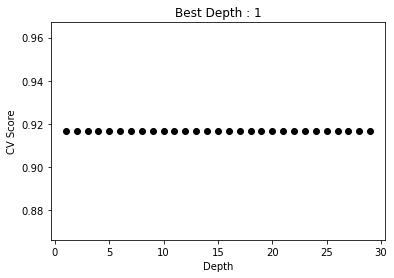

In [82]:
best_depth, best_score = best_depth_param(X_train, y_train)
best_score

In [83]:
DT = tree.DecisionTreeClassifier(max_depth = best_depth)
DT.fit(X_train, y_train)
DT.score(X_train, y_train), DT.score(X_test, y_test)

(1.0, 0.5)

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



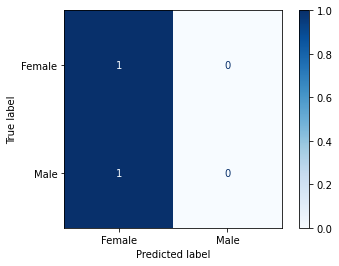

In [84]:
plot_confusion_matrix(DT, X_test, y_test, 
                      display_labels= ['Female','Male'], 
                      cmap = plt.cm.Blues);

### Decision Tree Model with Columns Feature Selection

Function to conduct cross validation in order to select the best variables/columns to be used as predictive variables of the target variable in the model:

In [85]:
def check_column_score(cols):
    """
    Trains and evaluates a model via cross-validation on the columns of the data
    with selected indices
    """
    print("training with columns " + str(cols))

    DT = tree.DecisionTreeClassifier(max_depth = 3)
    return cross_val_score(DT, X_train[cols], y_train, cv = 5).mean()    

In [86]:
predictive_vars = list(X_train.columns)
for d in range(1,20): 
    n_random_words = [random.choice(predictive_vars) for _ in range(7)]
    x = check_column_score(n_random_words)
    print("CV score is " + str(np.round(x, 3)))

training with columns ['Piercings', 'Married', 'Piercings', 'Weather', 'Hair', 'JunkFood', 'TotalKiss']
CV score is 0.933
training with columns ['Color', 'CoffeeOrTea', 'GregCliff', 'MaleKiss', 'Piercings', 'Weather', 'STEM']
CV score is 0.933
training with columns ['Kids', 'BodyPart', 'Die', 'Field', 'BodyPart', 'Codenames', 'Piercings']
CV score is 0.933
training with columns ['CoffeeOrTea', 'Pick', 'CoffeeOrTea', 'Sleep', 'MaleKiss', 'Temperature', 'ColdOrWarm']
CV score is 0.933
training with columns ['Crush', 'TotalKiss', 'Piercings', 'Eyes', 'Pick', 'Codenames', 'Tori2022']
CV score is 0.933
training with columns ['Coast', 'STEM', 'Hoodie', 'Codenames', 'Age', 'STEM', 'Ticket']
CV score is 0.533
training with columns ['Glasses', 'MaleKiss', 'Field', 'Kids', 'Color', 'PulledOver', 'BodyPart']
CV score is 0.867
training with columns ['Piercings', 'Coast', 'NuggetsOrTenders', 'Age', 'Weather', 'Pick', 'Coast']
CV score is 0.933
training with columns ['ExtrovertOrIntrovert', 'Ticket'

In [87]:
# set X_train and y_train to only have the desired/best found columns
X_train = X_train[['Piercings', 'Married', 'Piercings', 'Weather', 'Hair', 'JunkFood', 'TotalKiss']]
X_test = X_test[['Piercings', 'Married', 'Piercings', 'Weather', 'Hair', 'JunkFood', 'TotalKiss']]

0.9166666666666666

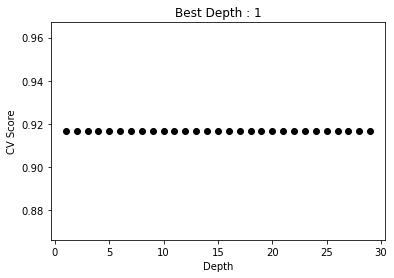

In [88]:
best_depth, best_score = best_depth_param(X_train, y_train)
best_score

In [89]:
DT = tree.DecisionTreeClassifier(max_depth = best_depth)
DT.fit(X_train, y_train)
DT.score(X_train, y_train), DT.score(X_test, y_test)

(1.0, 0.5)

In [90]:
y_test_pred = DT.predict(X_test)
c = confusion_matrix(y_test, y_test_pred)
c

array([[1, 0],
       [1, 0]])

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



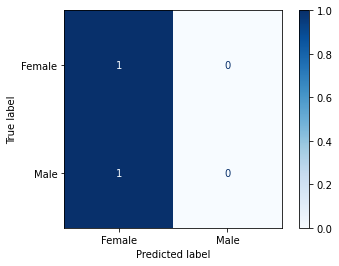

In [91]:
plot_confusion_matrix(DT, X_test, y_test, 
                      display_labels= ['Female','Male'], 
                      cmap = plt.cm.Blues);